In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [76]:
#read in dataset
df_og = pd.read_csv(r'./Data/ifood_df.csv')

In [77]:
#Creating a copy to use downstream
df=df_og.copy()

In [78]:
#shape
print("This dataset has:", df.shape[0], " rows and ", df.shape[1] , " columns" )

This dataset has: 2240  rows and  29  columns


In [79]:
# Lets take a look at what features we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [80]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [81]:
#Lets drop ID
df= df.drop('ID', axis=1)

In [82]:
# lets see how many numerical and categorical features we have
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 25 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

We have 3 categorical features : ['Education', 'Marital_Status', 'Dt_Customer']


In [83]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [84]:
# Since we have a lot of features....
columns_with_na = [column for column in df.columns if df[column].isna().sum() > 0]
print('We have {} columns with null values.'.format(len(columns_with_na)))

We have 1 columns with null values.


In [85]:
# We found that column income has 24 null values, since there are some outliers.
# Filling with median will be more robust
df['Income']=df['Income'].fillna(df['Income'].median())

In [86]:
# Check if NA are still present
columns_with_na = [column for column in df.columns if df[column].isna().sum() > 0]
print('We have {} columns with null values.'.format(len(columns_with_na)))

We have 0 columns with null values.


Brief descriptions of each feature
-  AcceptedCmp1: 1 if costumer accepted the offer in the 1st campaign, 0 otherwise
-  AcceptedCmp2: 1 if costumer accepted the offer in the 2nd campaign, 0 otherwise 
-  AcceptedCmp3: 1 if costumer accepted the offer in the 3rd campaign, 0 otherwise
-   AcceptedCmp4: 1 if costumer accepted the offer in the 4th campaign, 0 otherwise
-   AcceptedCmp5: 1 if costumer accepted the offer in the 5th campaign, 0 otherwise
-   Response(target): 1 if costumer accepted the offer in the last campaign, 0 otherwise
-   Complain: 1 if costumer complained in the last 2 years.
-   DtCustomer: date of customers enrollment with the company.
-   Education: Customers level of education
-   Marital: Customers marital status
-   Kidhome: number of small children in customers household
-    Teenhome: number of teenagers in customers household
-    Income: customers yearsly household income
-    MntFishProducts: amount spent on fish product in the last 2 years
-    MntMeatProducts: amount spent on meat product in the last 2 years
-    MntFruits: amount spent on fruits in the last 2 years
-    MntWines: amount spent on wines in the last 2 years
-    MntGoldProds: amount spent on gold product in the last 2 years
-    NumDealPurchases: number of purchases made with discount
-    NumCatalogPurchases: number of purchases made using catalogue
-    NumberStorePurchases: number of purchases made directly in stores
-    NumWebPurchases: number of purchases made through company's web site
-    NumWebVistisMonth: number of visits to company's web sited in the last month
-    Recency: number of days since the last purchase


In [87]:
# Lets take a look at describe()
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1969.0,12.0,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2240.0,52238.0,25038.0,1730.0,35539.0,51382.0,68290.0,666666.0
Kidhome,2240.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.0,29.0,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,304.0,337.0,0.0,24.0,174.0,504.0,1493.0
MntFruits,2240.0,26.0,40.0,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,167.0,226.0,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,38.0,55.0,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2240.0,27.0,41.0,0.0,1.0,8.0,33.0,263.0


In [88]:
def plot_numerical_features(df):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

    for feature in numerical_features:
        plt.figure(figsize=(12, 6))
        
        # Create displot
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=feature, kde=True)
        plt.title(f'Distribution of {feature}')
        
        # Create boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=feature)
        plt.title(f'Boxplot of {feature}')
        
        plt.tight_layout()
        plt.show()

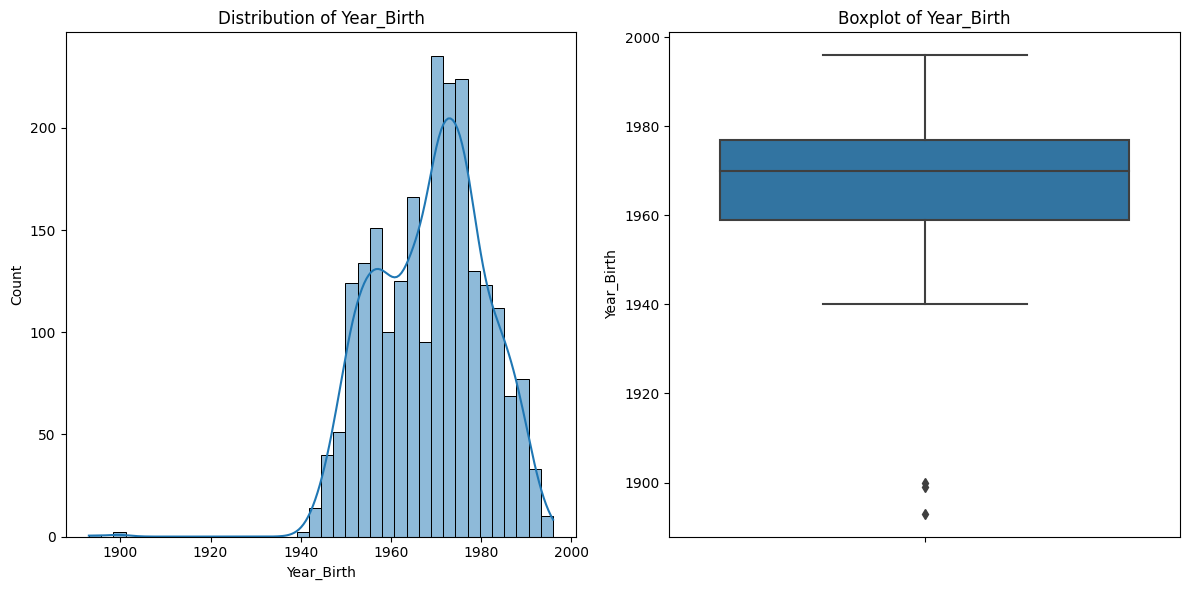

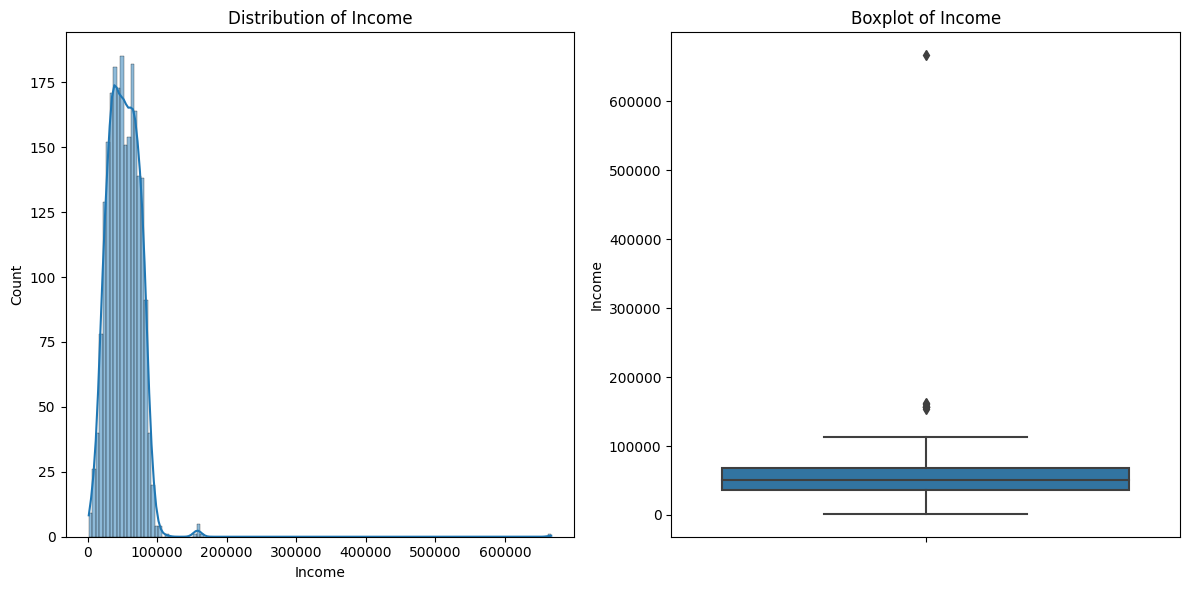

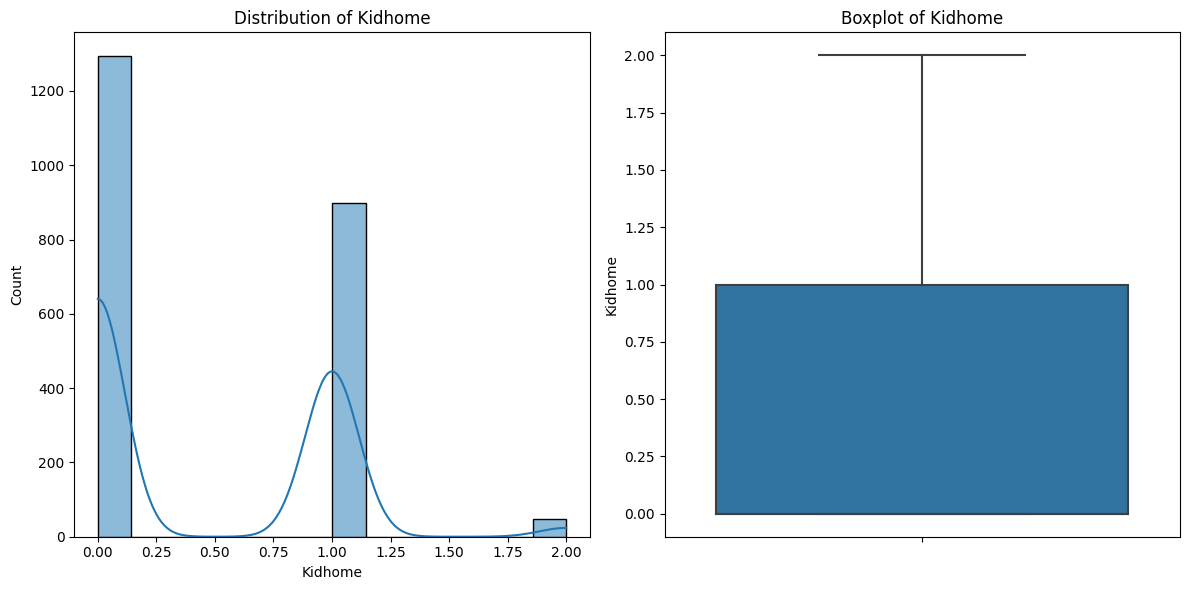

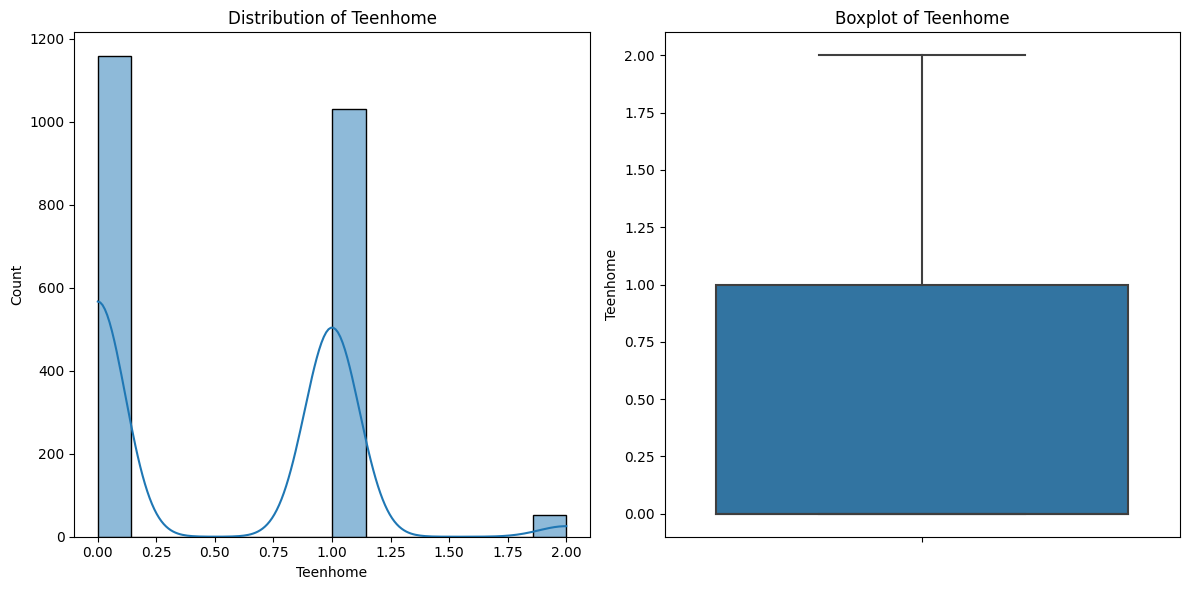

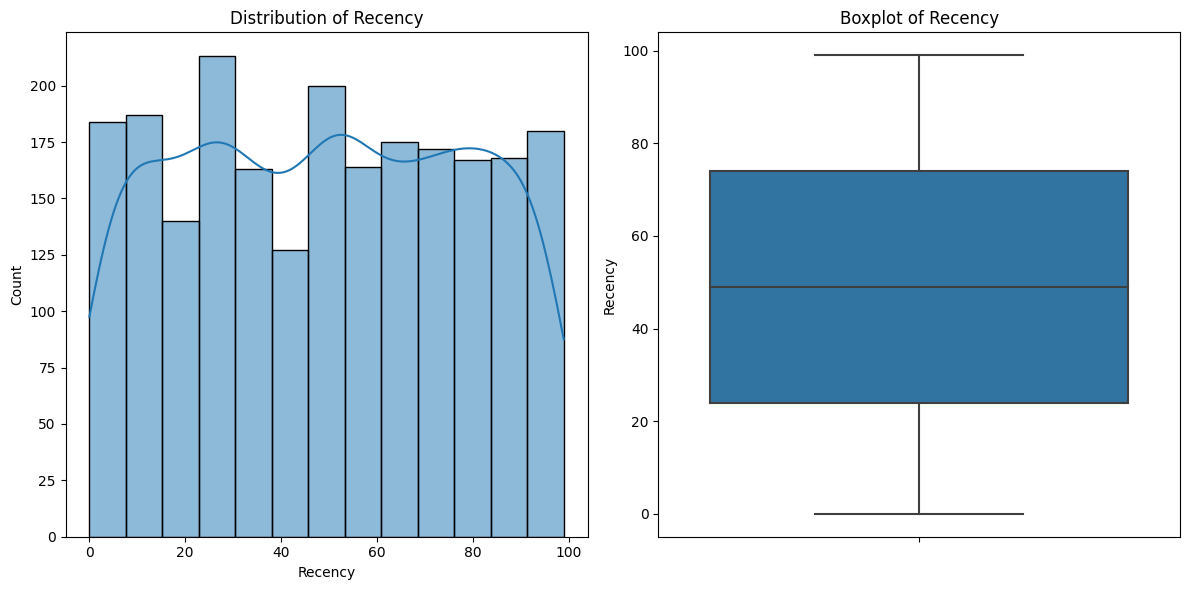

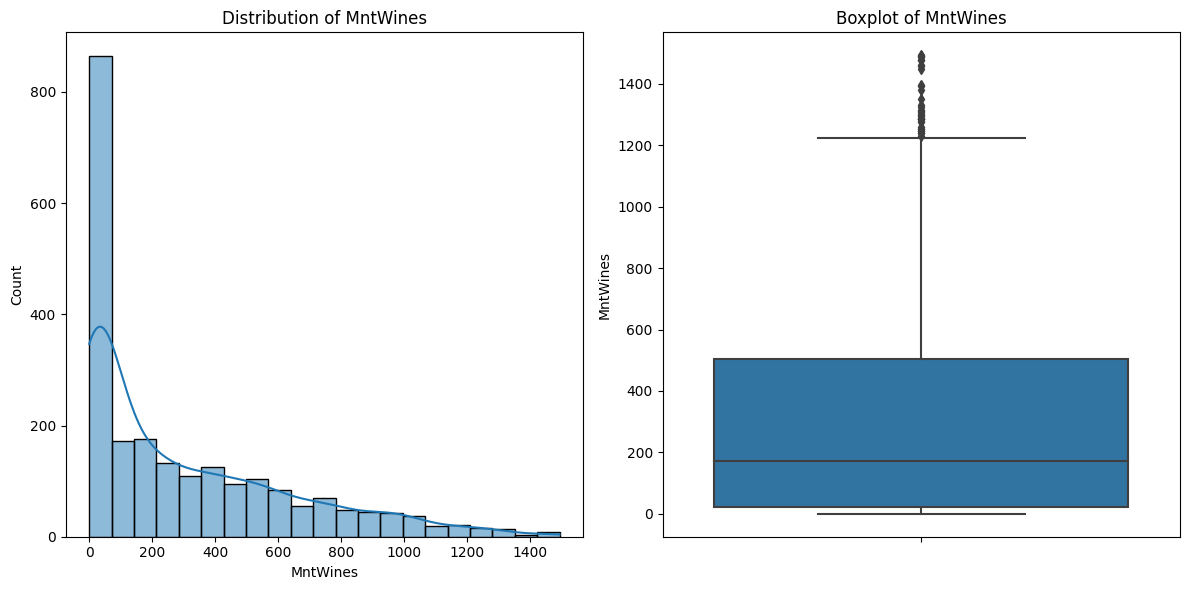

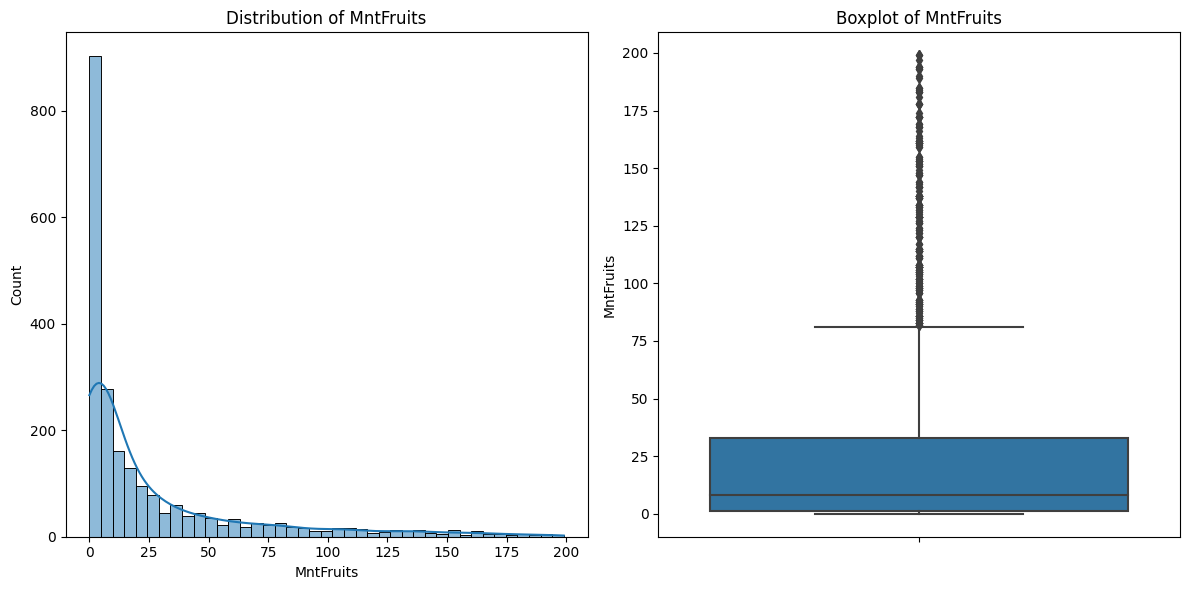

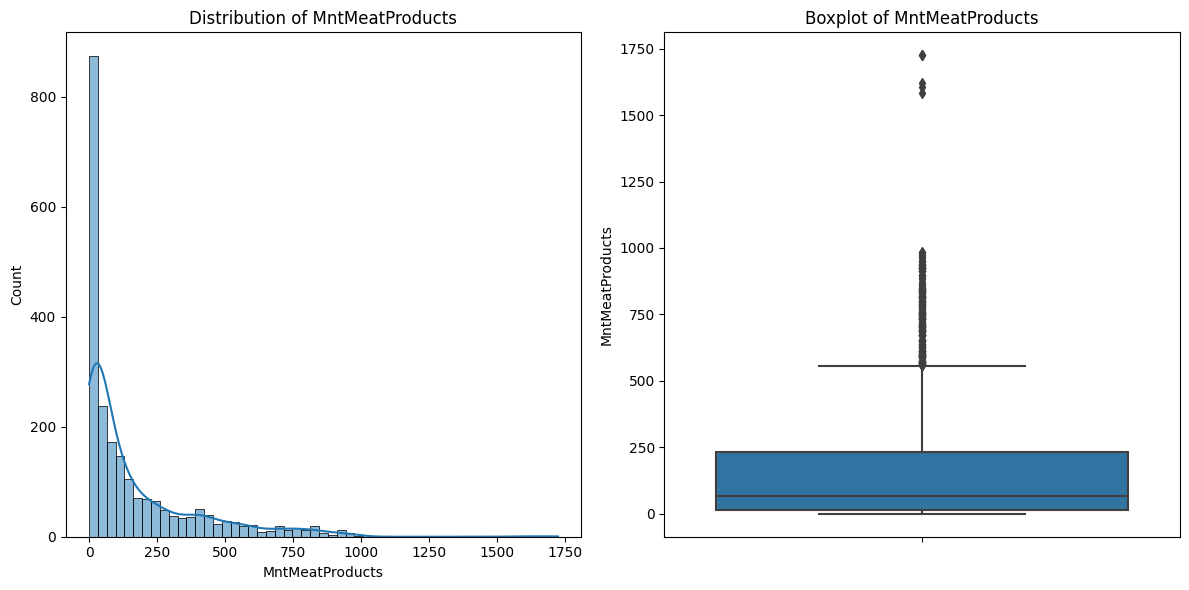

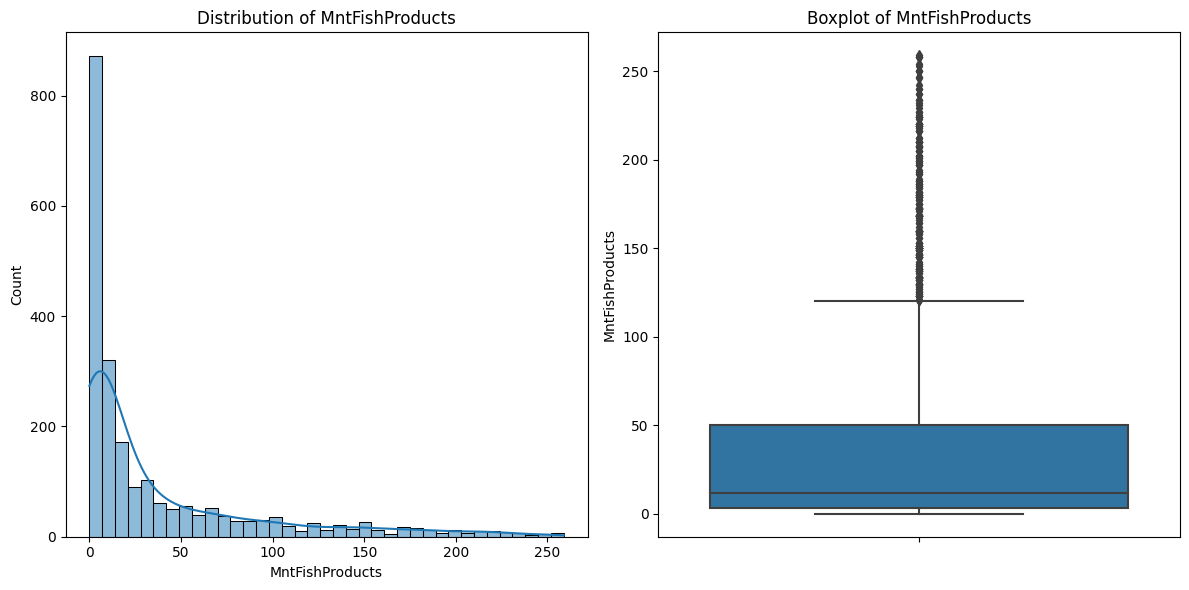

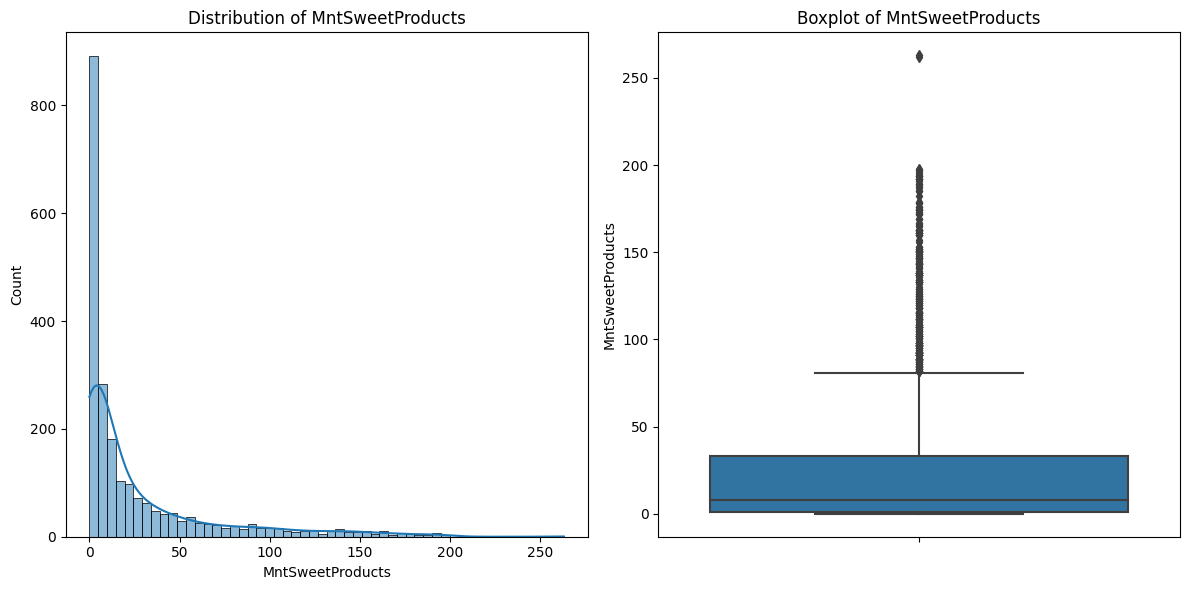

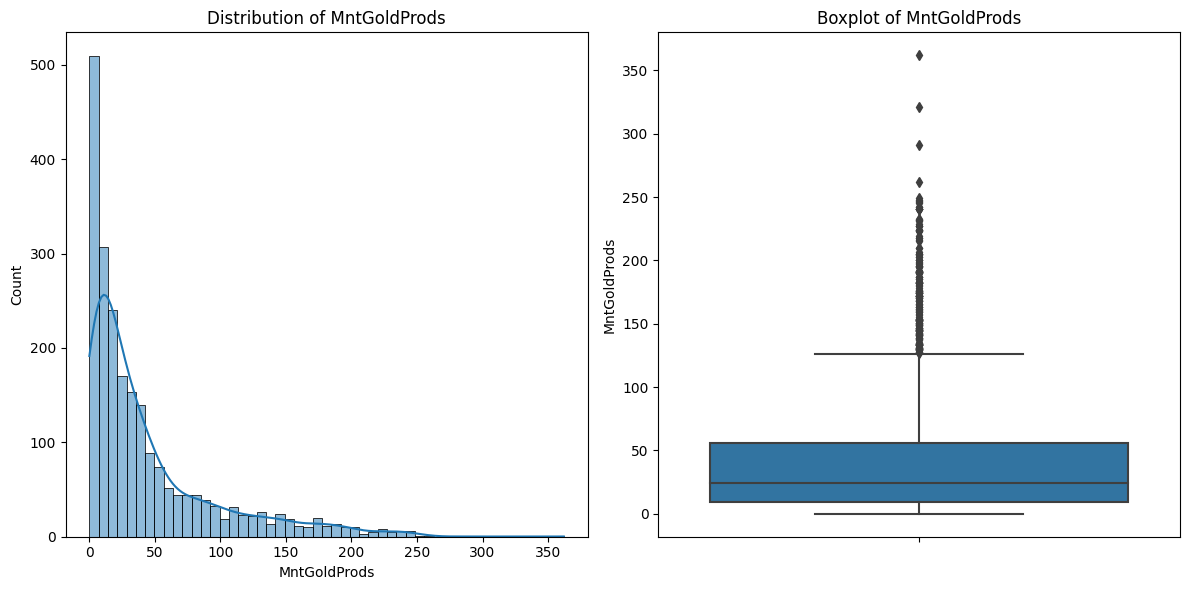

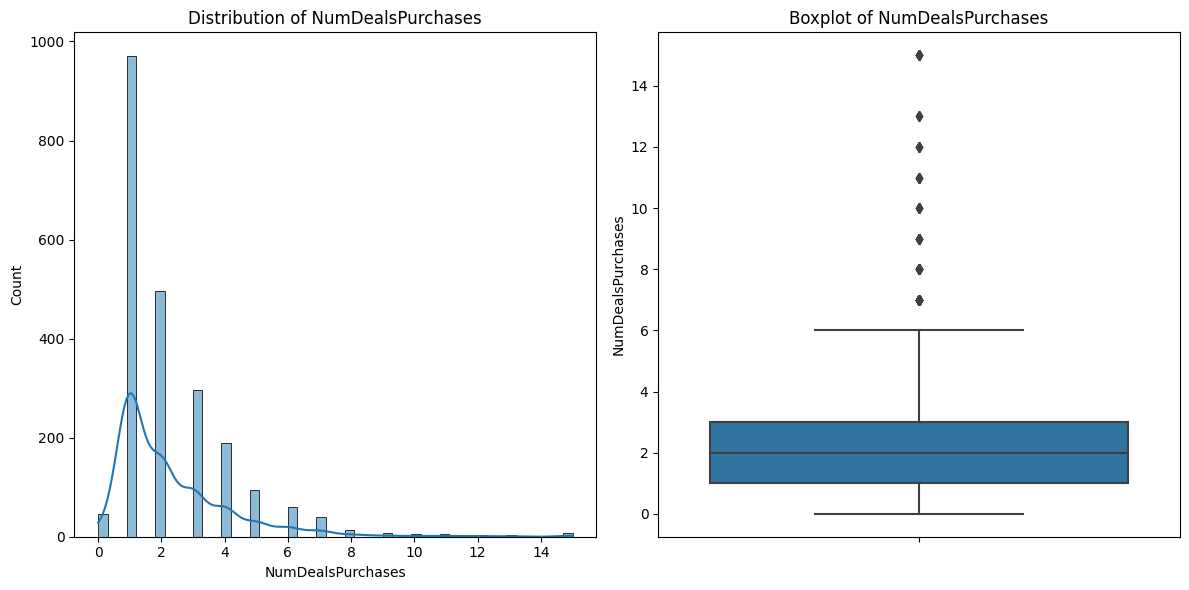

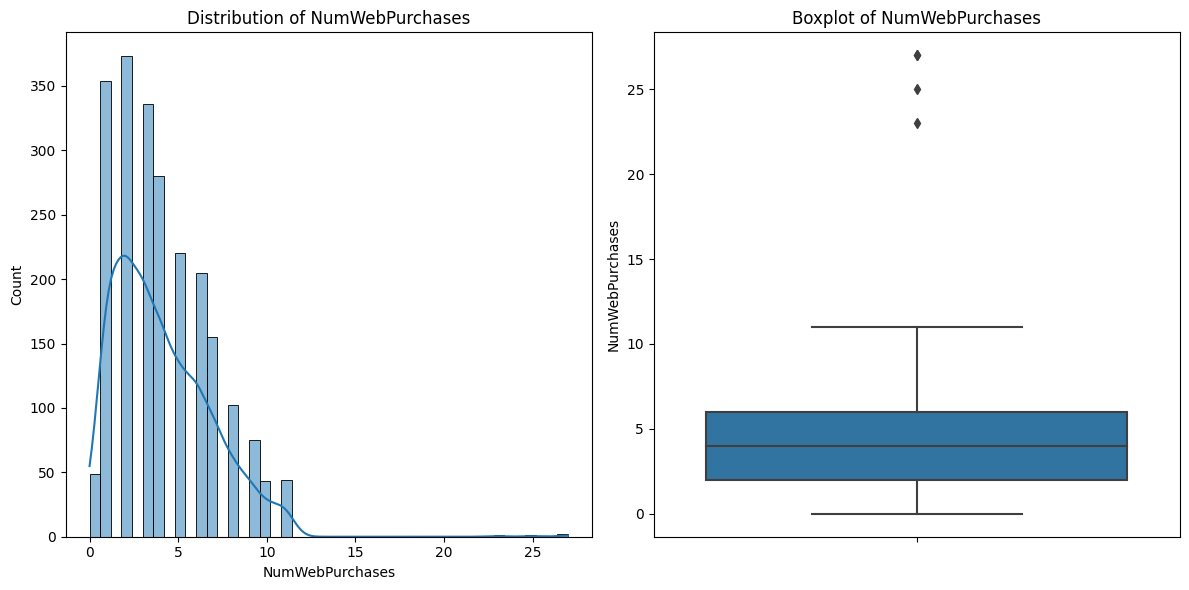

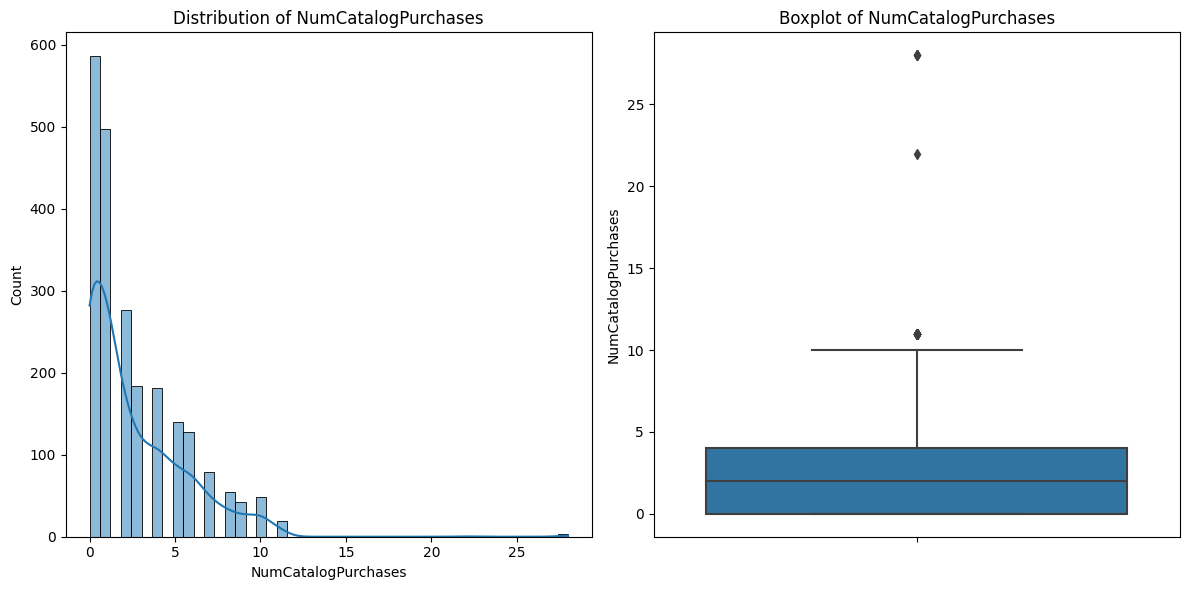

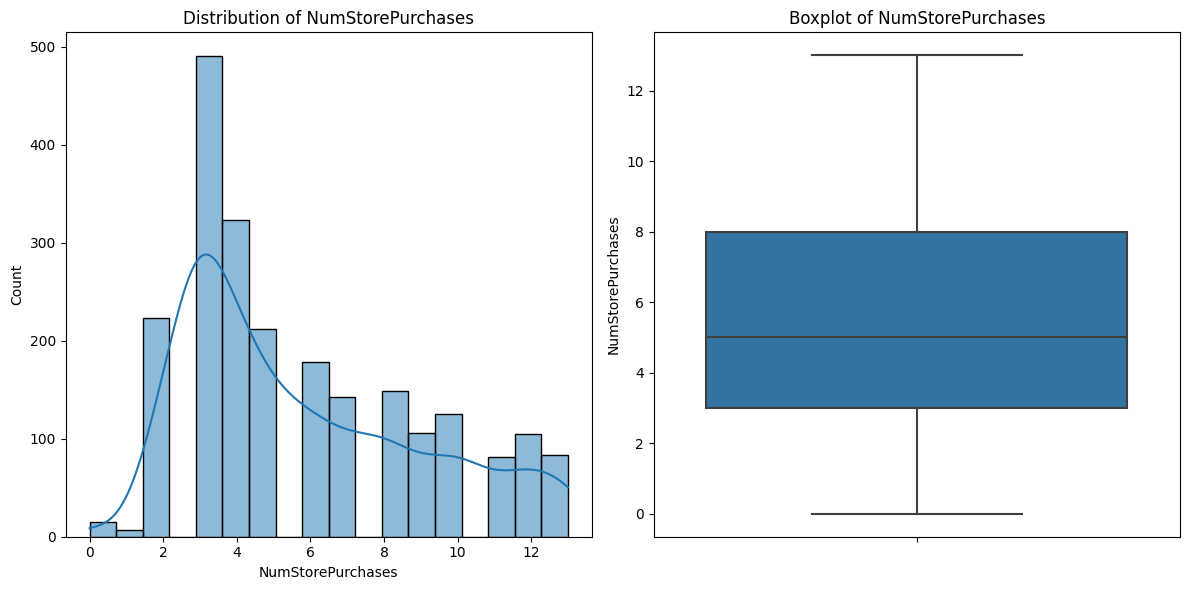

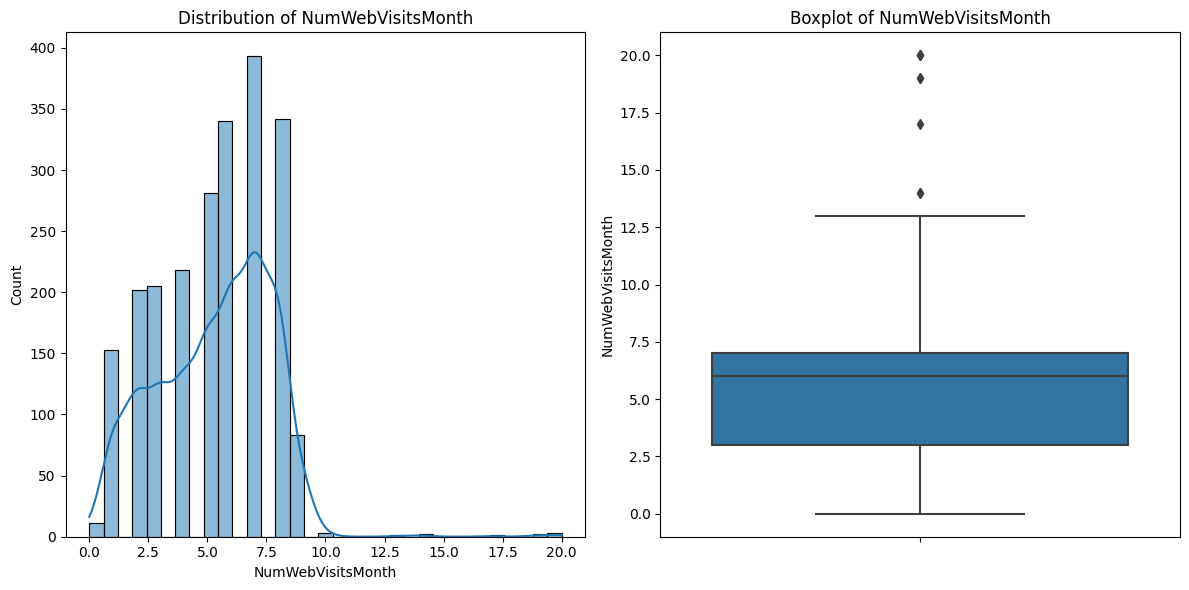

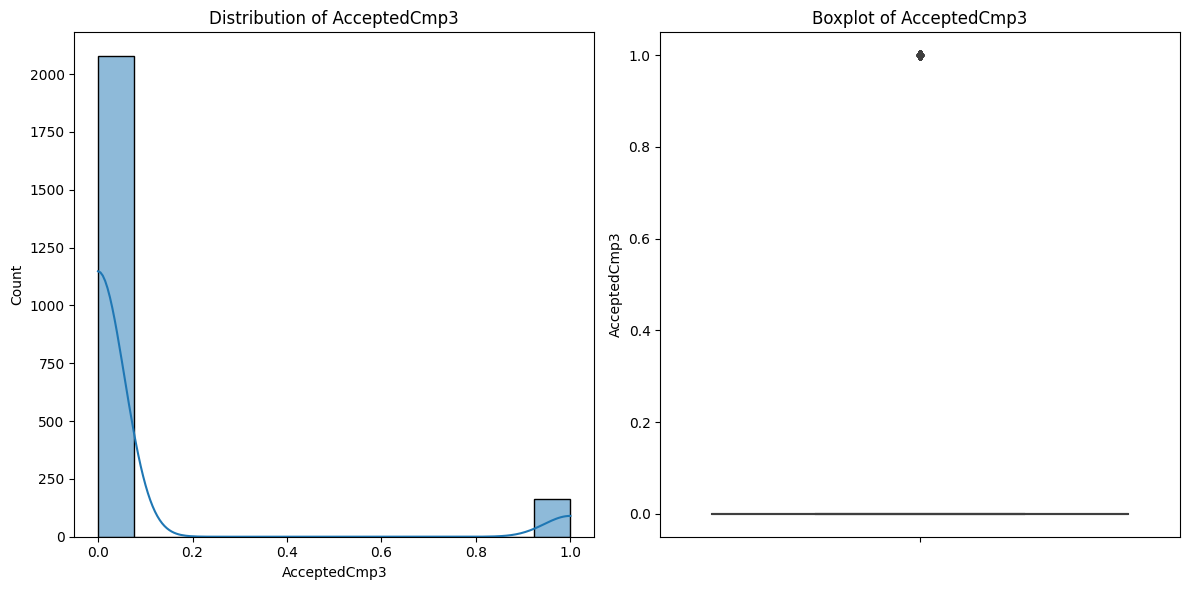

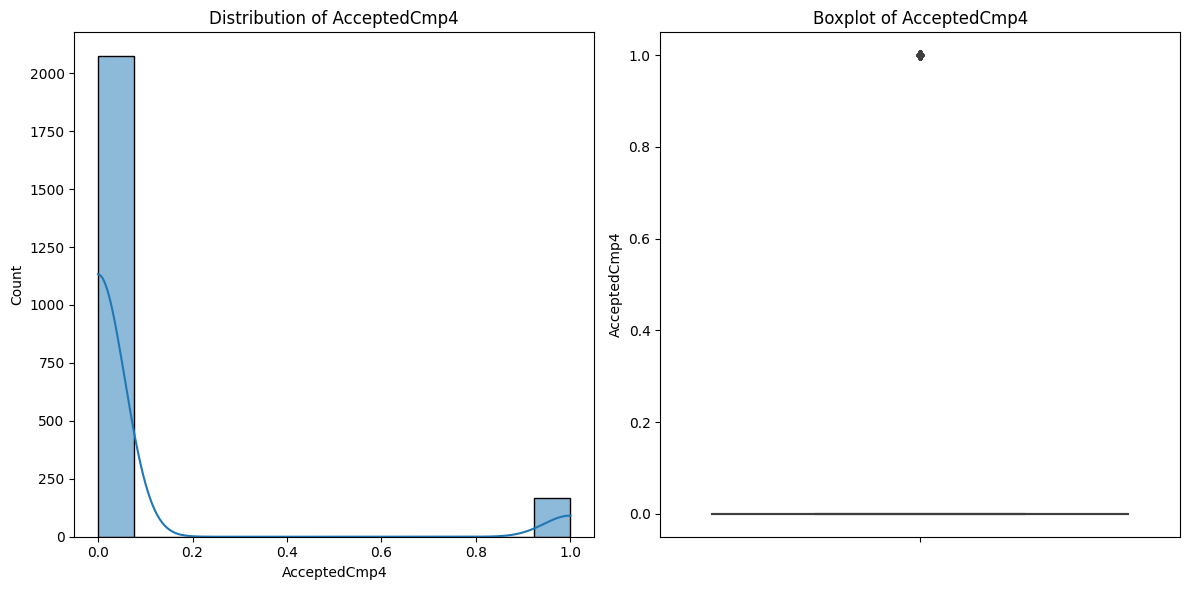

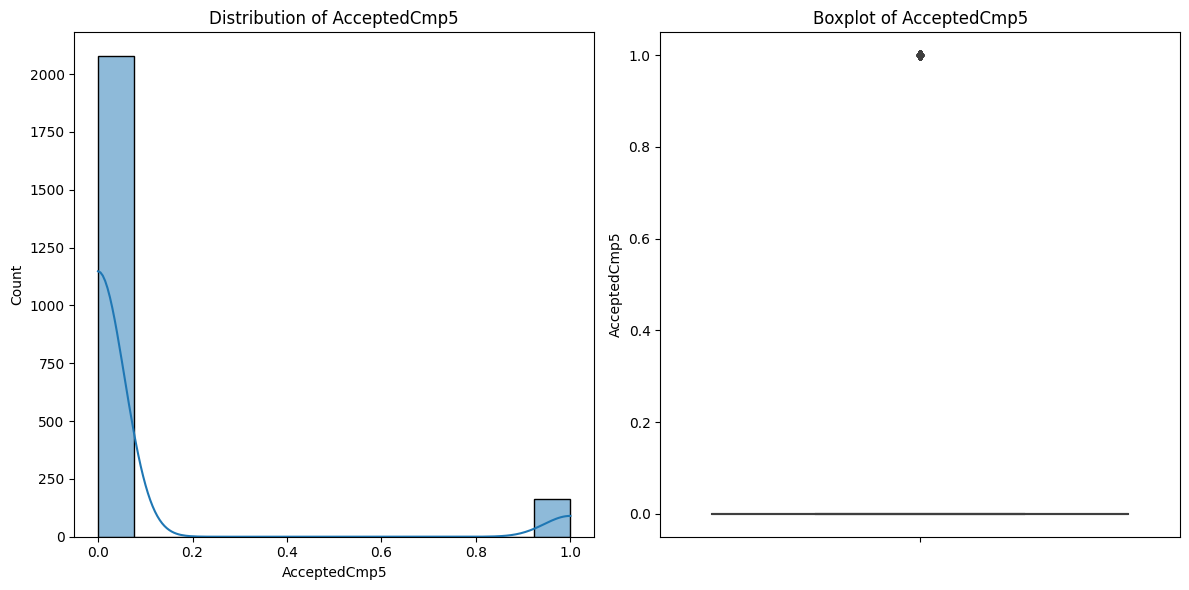

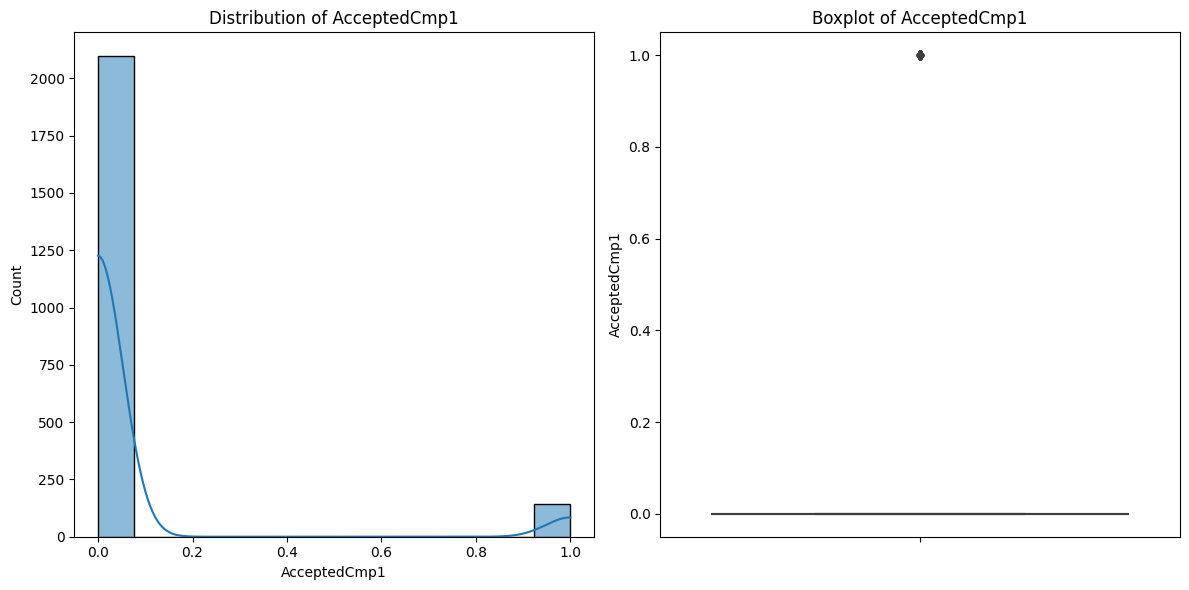

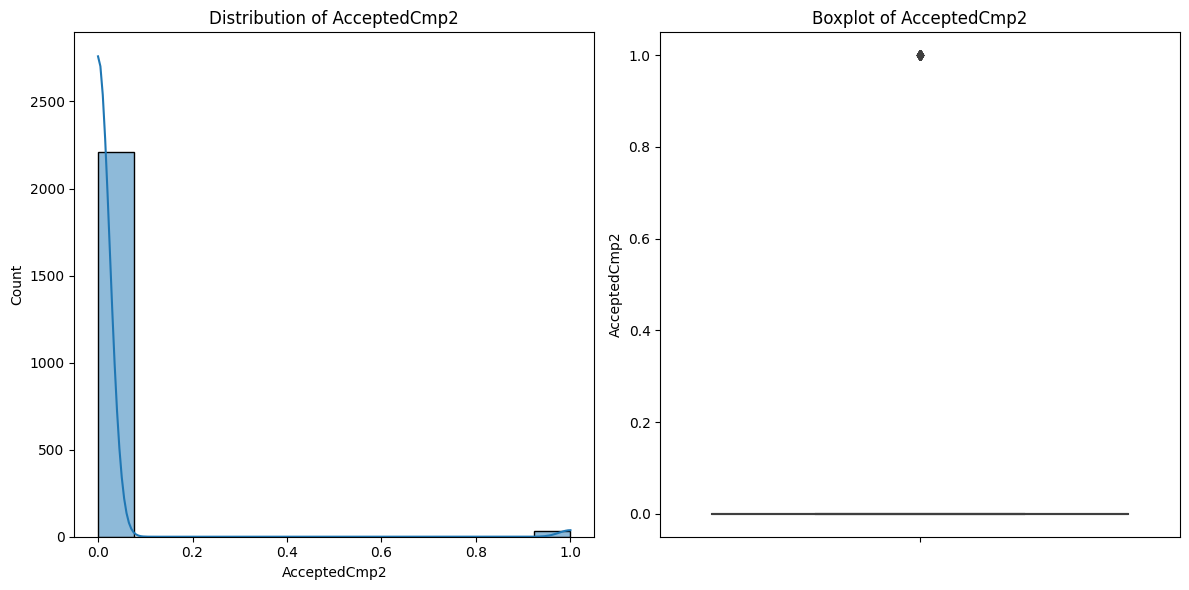

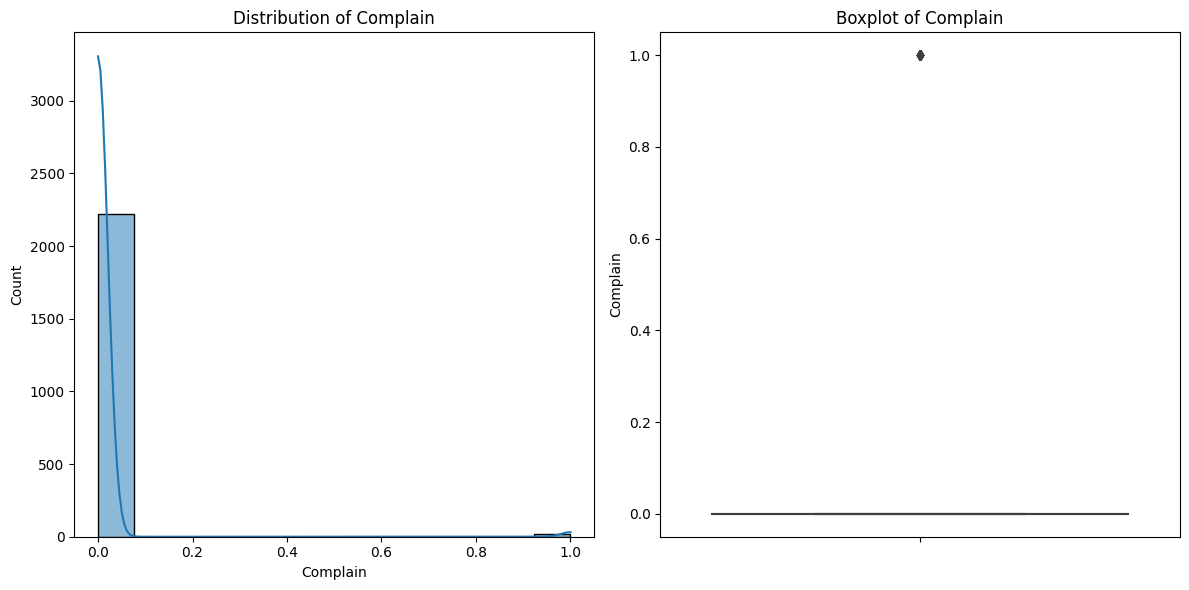

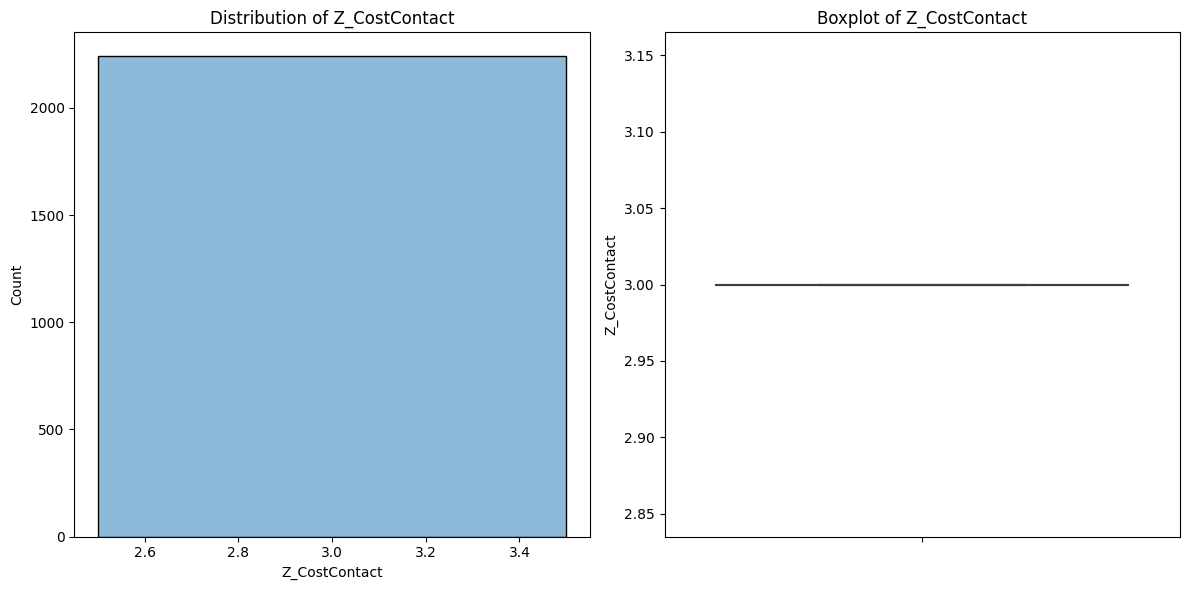

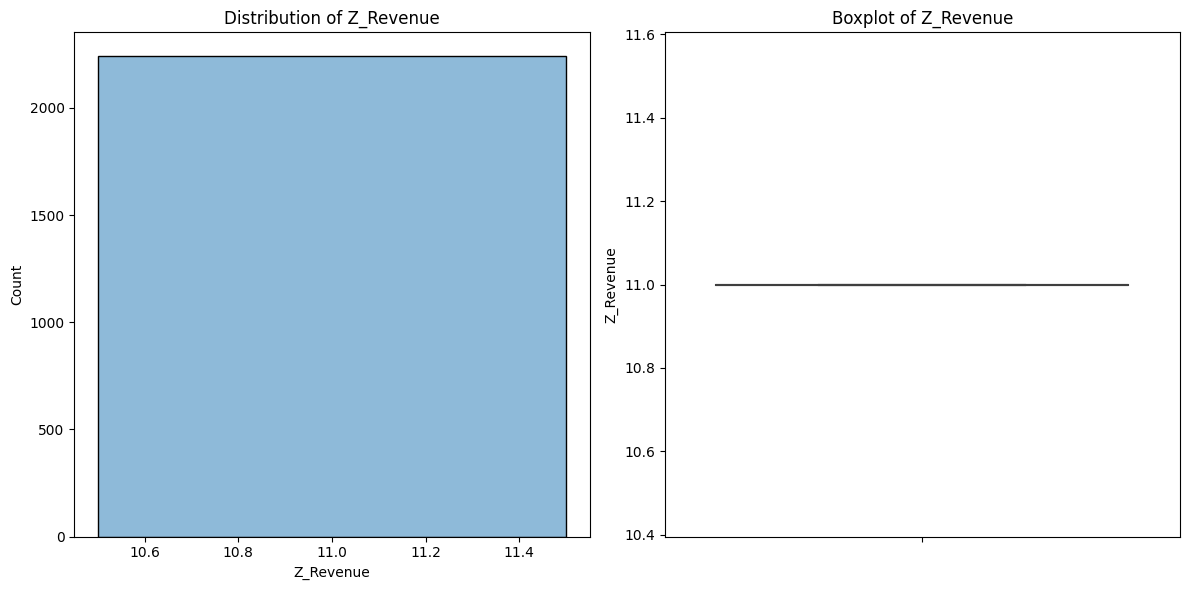

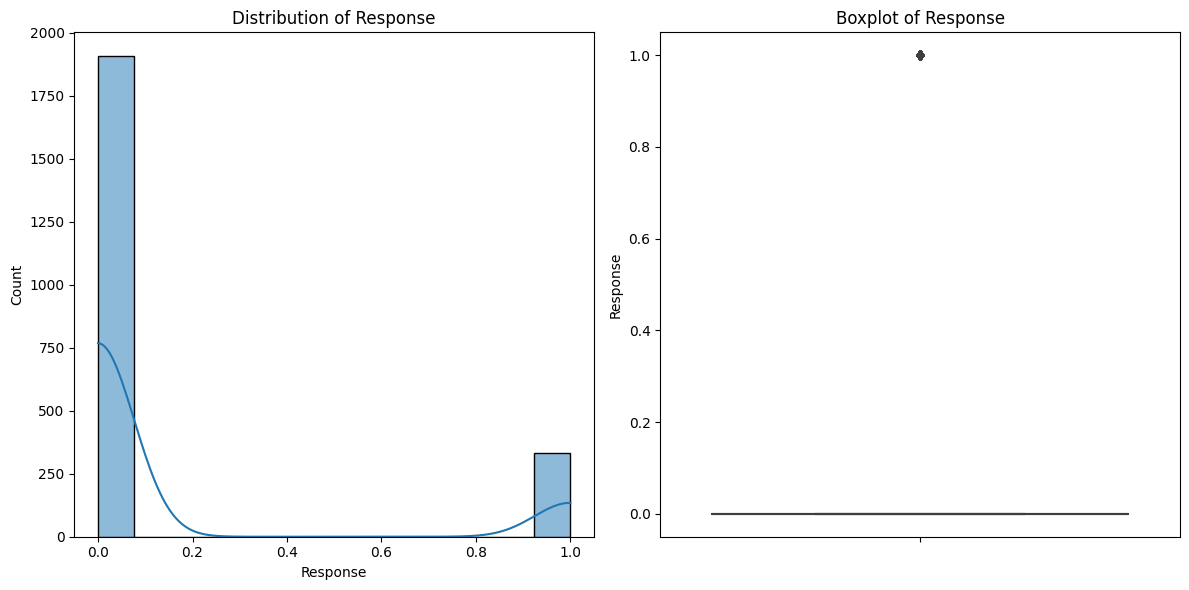

In [89]:
plot_numerical_features(df)

In [90]:

def plot_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category']).columns

    for feature in categorical_features:
        if(feature != 'Dt_Customer'):
            plt.figure(figsize=(12, 6))
            
            # Create bar plot
            plt.subplot(1, 2, 1)
            sns.countplot(data=df, x=feature)
            plt.title(f'Bar Plot of {feature}')
            plt.xticks(rotation=90)
            
            # Create pie chart
            plt.subplot(1, 2, 2)
            counts = df[feature].value_counts()
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
            plt.title(f'Pie Chart of {feature}')
            
            plt.tight_layout()
            plt.show()



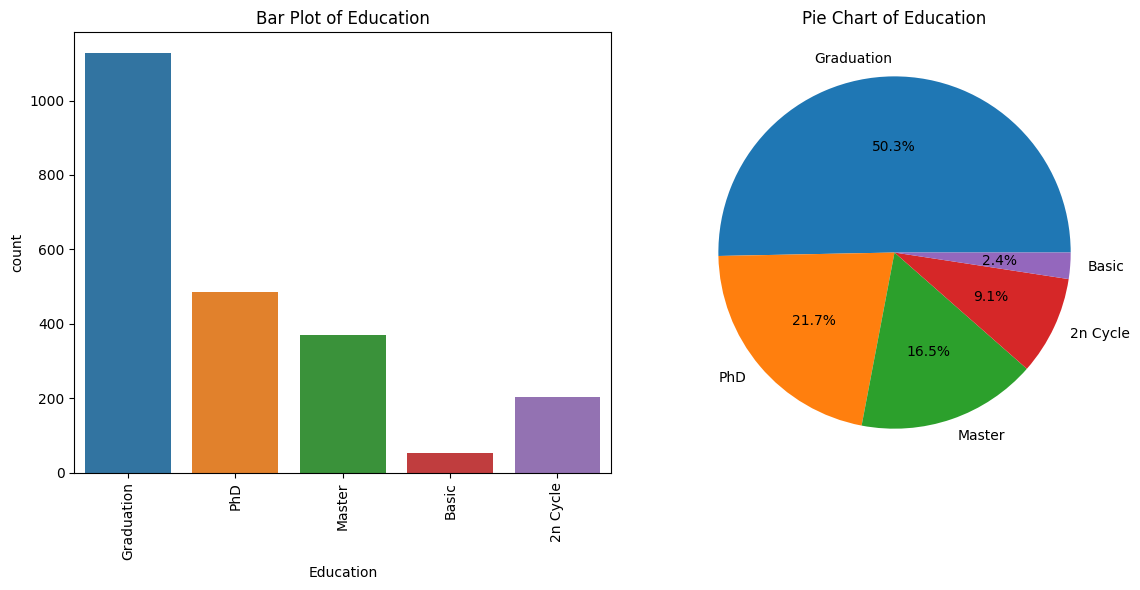

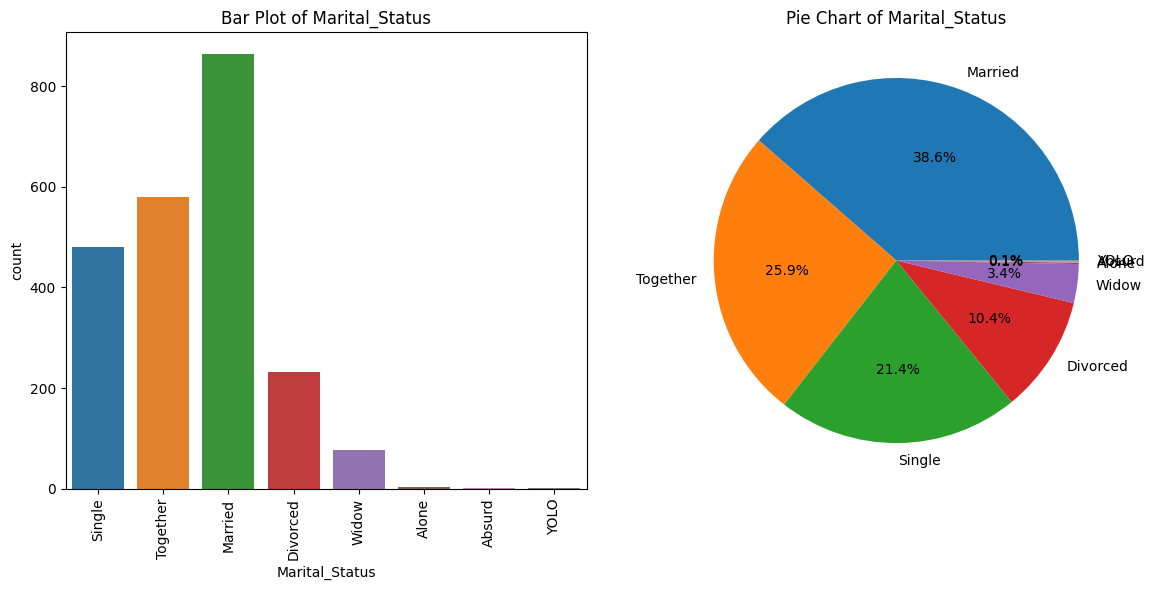

In [91]:
plot_categorical_features(df)